## Model Development: Run 1

In [1]:
# Import libraries 
import os 
import sys 
import pandas as pd 
import numpy as np 

# System configuration 
sys.path.append(os.path.join(".."))

## Workflow

+ Data Preparation
+ Model Building: Building a Linear Regression model 
+ Model Training: Training linear regression model with training datasets
+ Model Validation: Evaluate model performance on testing datasets

## Data Preparation

In [2]:
# Load the dataset
from scripts.collection.ingestor import FileIngestor

In [3]:
# Load the dataset
ingestor = FileIngestor(folder="training", filename="processed_lp_data.csv")
dataset = ingestor.ingest()
dataset

,PRICE,TOUCHSCREEN,BLUETOOTH,HARD_DRIVE,SSD_CAPACITY,DISPLAY,WEBCAM(BUILT-IN),COLOR,BRAND_acer,BRAND_asus,...,GPU_intel,GPU_mali,GPU_nvidia,GPU_other,OPERATING_SYSTEM_android,OPERATING_SYSTEM_chrome,OPERATING_SYSTEM_linux,OPERATING_SYSTEM_mac,OPERATING_SYSTEM_unknown,OPERATING_SYSTEM_windows
0,303.80,0,0,512,1,0,1,6,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,175.00,0,1,500,500,1,1,1,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,85.00,1,1,16,240,1,1,1,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,101.25,0,1,256,256,1,1,11,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,50.00,0,0,256,16,0,1,1,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4177,162.20,0,0,256,240,0,0,11,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4178,93.25,0,0,256,240,0,0,11,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4179,424.80,0,0,256,120,0,0,1,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4180,90.94,1,1,256,240,0,1,11,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Model Development

In [4]:
# Import functionalities 
from models.models import RegressModel
from models.pipeline import Pipeline

# Import models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet

Building 4 regression models: 
- model 1: Linear Regression model
- model 2: Ridge Regression model
- model 3: Lasso Regression model
- model 4: ElasticNet Regression model

In [5]:
# Build a ml system through a pipeline
mlsystem1 = Pipeline(RegressModel(base_model=LinearRegression(), name="Linear Regression"), dataset, test_size=0.25)
mlsystem2 = Pipeline(RegressModel(base_model=Ridge(), name="Ridge Regression"), dataset, test_size=0.25)
mlsystem3 = Pipeline(RegressModel(base_model=Lasso(), name="Lasso Regression"), dataset, test_size=0.25)
mlsystem4 = Pipeline(RegressModel(base_model=ElasticNet(), name="ElasticNet Regression"), dataset, test_size=0.25)

In [6]:
# ML System 1 with model: Linear Regression
mlsystem1.run()
mlsystem2.run()
mlsystem3.run()
mlsystem4.run()

Model name: Linear Regression
Mean Absolute Error: 200.94896778249256
Mean Squared Error: 116407.62489903987
R2 Score: 0.16213973546544636 
 
Model name: Ridge Regression
Mean Absolute Error: 200.8889284102419
Mean Squared Error: 116392.92194241851
R2 Score: 0.1622455620651635 
 
Model name: Lasso Regression
Mean Absolute Error: 199.4057597964226
Mean Squared Error: 116607.88980287641
R2 Score: 0.1606983006328827 
 
Model name: ElasticNet Regression
Mean Absolute Error: 200.1741431569248
Mean Squared Error: 124206.26731244352
R2 Score: 0.10600790903936941 
 


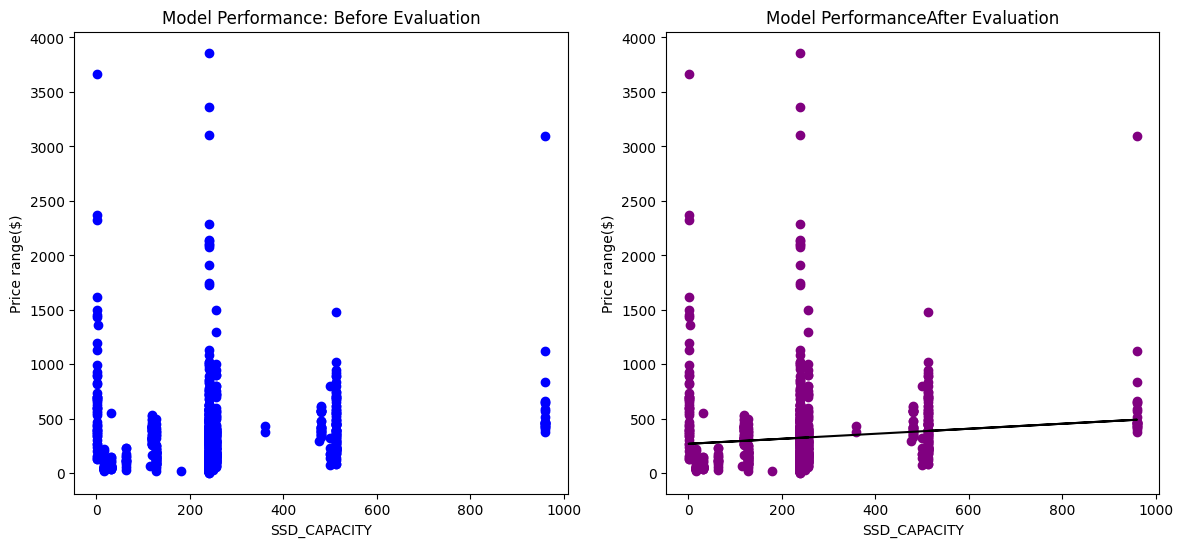

In [7]:
# Visualise model performance 
mlsystem1.visualise("SSD_CAPACITY")

Import key points for improving performance:
+ apply outlier analysis
+ scaling feature using Feature Transformation technique

## Model Registry

In [8]:
# Import functionalities: model packaging
from scripts.model_dev.model_registor import ModelRegistor

In [9]:
# Instantiate model registor object
registor1 = ModelRegistor(model=mlsystem1,folder="model_registry")
registor2 = ModelRegistor(model=mlsystem2,folder="model_registry")
registor3 = ModelRegistor(model=mlsystem3,folder="model_registry")
registor4 = ModelRegistor(model=mlsystem4,folder="model_registry")

In [ ]:
# Package all 4 models 
model_packagers = [registor1,registor2,registor3,registor4]
model_names = ["linear_model", "ridge_model","lasso_model", "elnet_model"]

for packager, name in zip(model_packagers, model_names):
    # Package the model
    packager.save(name)
    

Model linear_model.pkl: packaging successful. File in path c:\Development\Projects\MachineLearning\Laptop-Price-Predictor-System\models\model_registry
Model ridge_model.pkl: packaging successful. File in path c:\Development\Projects\MachineLearning\Laptop-Price-Predictor-System\models\model_registry
Model lasso_model.pkl: packaging successful. File in path c:\Development\Projects\MachineLearning\Laptop-Price-Predictor-System\models\model_registry
Model elnet_model.pkl: packaging successful. File in path c:\Development\Projects\MachineLearning\Laptop-Price-Predictor-System\models\model_registry


Created by Adoan Mian - 18-01-2026